<a href="https://colab.research.google.com/github/vkthakur90/AI_Applications/blob/master/Option_Strategy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
class Call:
    def __init__(self, strike, premium):
        self._strike = strike
        self._premium = premium

    @property
    def premium(self):
        return self._premium

    def __call__(self, spot_price):
        if spot_price > self._strike :
            return spot_price - self._strike
        else:
            return 0

In [3]:
class Put:
    def __init__(self, strike, premium):
        self._strike = strike
        self._premium = premium

    @property
    def premium(self):
        return self._premium

    def __call__(self, spot_price):
        if spot_price < self._strike :
            return self._strike - spot_price
        else:
            return 0

In [4]:
def get_payoff():
    temp = pd.DataFrame({
        'S' : np.linspace(start = 0, stop = 1000, num = 5000 + 1, endpoint = True)
    })

    deep_itm_call = Call(100, 420)
    itm_call = Call(300, 250)
    atm_call = Call(500, 80)
    otm_call = Call(700, 50)
    deep_otm_call = Call(900, 20)

    deep_itm_put = Put(900, 420)
    itm_put = Put(700, 250)
    atm_put = Put(500, 80)
    otm_put = Put(300, 50)
    deep_otm_put = Put(100, 20)

    net_premium = itm_call.premium + itm_put.premium - atm_call.premium - atm_put.premium

    temp['deep_itm_call'] = temp['S'].apply(lambda t: deep_itm_call(t) - deep_itm_call.premium)
    temp['itm_call'] = temp['S'].apply(lambda t: itm_call(t) - itm_call.premium)
    temp['atm_call'] = temp['S'].apply(lambda t : atm_call(t) - atm_call.premium)
    temp['otm_call'] = temp['S'].apply(lambda t : otm_call(t)- otm_call.premium)
    temp['deep_otm_call'] = temp['S'].apply(lambda t: deep_otm_call(t) - deep_otm_call.premium)

    temp['deep_itm_put'] = temp['S'].apply(lambda t: deep_itm_put(t) - deep_itm_put.premium)
    temp['itm_put'] = temp['S'].apply(lambda t: itm_put(t) - itm_put.premium)
    temp['atm_put'] = temp['S'].apply(lambda t : atm_put(t) - atm_put.premium)
    temp['otm_put'] = temp['S'].apply(lambda t : otm_put(t) - otm_put.premium)
    temp['deep_otm_put'] = temp['S'].apply(lambda t: deep_otm_put(t) - deep_otm_put.premium)

    temp.eval('bull_call_spread = itm_call - atm_call', inplace = True)
    temp.eval(f'prem_bull_call_spread = - ({itm_call.premium - atm_call.premium})', inplace = True)

    temp.eval('bear_call_spread = otm_call - atm_call', inplace = True)
    temp.eval(f'prem_bear_call_spread = - ({otm_call.premium - atm_call.premium})', inplace = True)

    temp.eval('call_butterfly = itm_call + otm_call - 2 * atm_call', inplace = True)
    temp.eval(f'prem_call_butterfly = - ({itm_call.premium + otm_call.premium - 2 * atm_call.premium})', inplace = True)

    temp.eval('call_condor = deep_itm_call - itm_call - otm_call + deep_otm_call', inplace = True)
    temp.eval(f'prem_call_condor = -({deep_itm_call.premium - itm_call.premium - otm_call.premium + deep_otm_call.premium})', inplace = True)

    temp.eval('bear_put_spread = itm_put - atm_put', inplace = True)
    temp.eval(f'prem_bear_put_spread = -({itm_put.premium - atm_put.premium})', inplace = True)

    temp.eval('bull_put_spread = otm_put - atm_put', inplace = True)
    temp.eval(f'prem_bull_put_spread = -({otm_put.premium - atm_put.premium})', inplace = True)

    temp.eval('put_butterfly = itm_put + otm_put - 2 * atm_put', inplace = True)
    temp.eval(f'prem_put_butterfly = -({itm_put.premium + otm_put.premium - 2 * atm_put.premium})', inplace = True)

    temp.eval('put_condor = deep_itm_put - itm_put - otm_put + deep_otm_put', inplace = True)
    temp.eval(f'prem_put_condor = -({deep_itm_put.premium - itm_put.premium - otm_put.premium + deep_otm_put.premium})', inplace = True)

    temp.eval('long_ironfly = itm_call + itm_put - atm_call - atm_put', inplace = True)
    temp.eval(f'prem_long_ironfly = -({itm_call.premium + itm_put.premium - atm_call.premium - atm_put.premium})', inplace = True)

    temp.eval('short_ironfly = otm_call + otm_put - atm_call - atm_put', inplace = True)
    temp.eval(f'prem_short_ironfly = -({otm_call.premium + otm_put.premium - atm_call.premium - atm_put.premium})', inplace = True)

    temp.eval('long_ironcondor = deep_itm_call - itm_call - itm_put + deep_itm_put', inplace = True)
    temp.eval(f'prem_long_ironcondor = -({deep_itm_call.premium - itm_call.premium - itm_put.premium + deep_itm_put.premium})', inplace = True)

    temp.eval('short_ironcondor = deep_otm_call - otm_call - otm_put + deep_otm_put', inplace = True)
    temp.eval(f'prem_short_ironcondor = -({deep_otm_call.premium - otm_call.premium - otm_put.premium + deep_otm_put.premium})', inplace = True)

    return temp

In [5]:
call_payoff_df = get_payoff()

Text(500.5, 0, 'At the money')

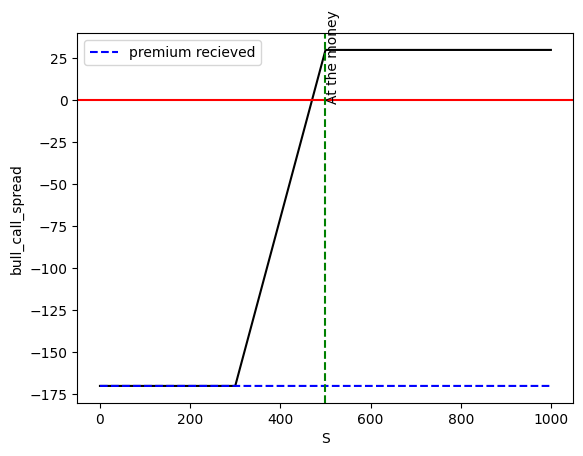

In [6]:
sns.lineplot(x = 'S', y = 'bull_call_spread', data = call_payoff_df, color = 'black')
sns.lineplot(x = 'S', y = 'prem_bull_call_spread', data = call_payoff_df, color = 'blue', linestyle = '--', label = 'premium recieved')
plt.axhline(y = 0.0, color = 'red', linestyle = '-')
plt.axvline(500, ymin = 0, ymax = 1, color = 'green', linestyle = '--')
plt.text(500 + 0.5, 0, 'At the money',rotation=90)

Text(500.5, 0, 'At the money')

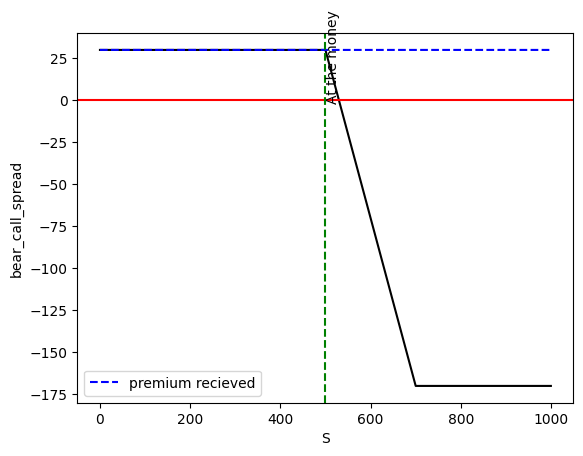

In [7]:
sns.lineplot(x = 'S', y = 'bear_call_spread', data = call_payoff_df, color = 'black')
sns.lineplot(x = 'S', y = 'prem_bear_call_spread', data = call_payoff_df, color = 'blue', linestyle = '--', label = 'premium recieved')
plt.axhline(y = 0.0, color = 'red', linestyle = '-')
plt.axvline(500, ymin = 0, ymax = 1, color = 'green', linestyle = '--')
plt.text(500 + 0.5, 0, 'At the money',rotation=90)

Text(500.5, 0, 'At the money')

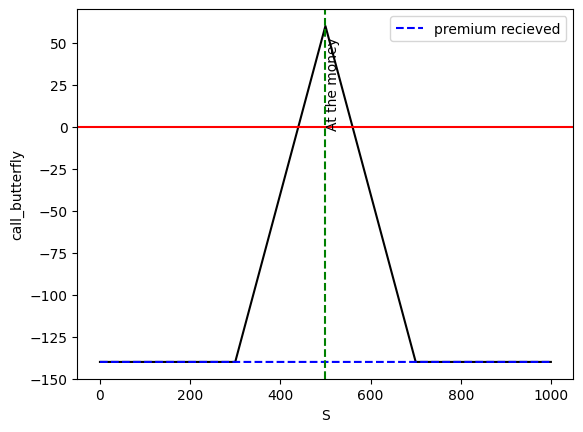

In [8]:
sns.lineplot(x = 'S', y = 'call_butterfly', data = call_payoff_df, color = 'black')
sns.lineplot(x = 'S', y = 'prem_call_butterfly', data = call_payoff_df, color = 'blue', linestyle = '--', label = 'premium recieved')
plt.axhline(y = 0.0, color = 'red', linestyle = '-')
plt.axvline(500, ymin = 0, ymax = 1, color = 'green', linestyle = '--')
plt.text(500 + 0.5, 0, 'At the money',rotation=90)

Text(500.5, 0, 'At the money')

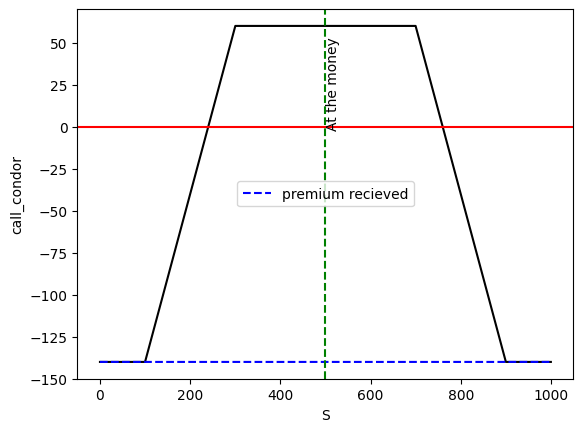

In [9]:
sns.lineplot(x = 'S', y = 'call_condor', data = call_payoff_df, color = 'black')
sns.lineplot(x = 'S', y = 'prem_call_condor', data = call_payoff_df, color = 'blue', linestyle = '--', label = 'premium recieved')
plt.axhline(y = 0.0, color = 'red', linestyle = '-')
plt.axvline(500, ymin = 0, ymax = 1, color = 'green', linestyle = '--')
plt.text(500 + 0.5, 0, 'At the money',rotation=90)

Text(500.5, 0, 'At the money')

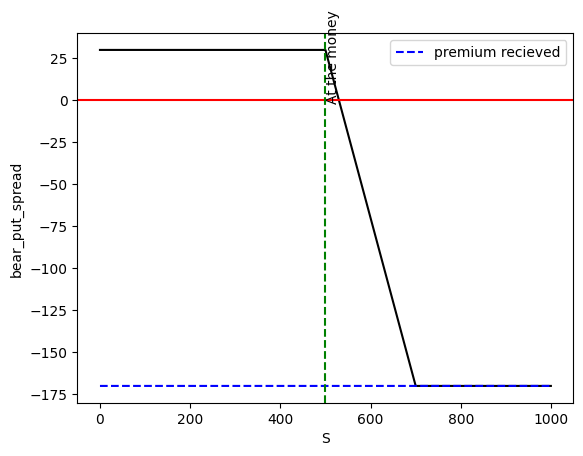

In [10]:
sns.lineplot(x = 'S', y = 'bear_put_spread', data = call_payoff_df, color = 'black')
sns.lineplot(x = 'S', y = 'prem_bear_put_spread', data = call_payoff_df, color = 'blue', linestyle = '--', label = 'premium recieved')
plt.axhline(y = 0.0, color = 'red', linestyle = '-')
plt.axvline(500, ymin = 0, ymax = 1, color = 'green', linestyle = '--')
plt.text(500 + 0.5, 0, 'At the money',rotation=90)

Text(500.5, 0, 'At the money')

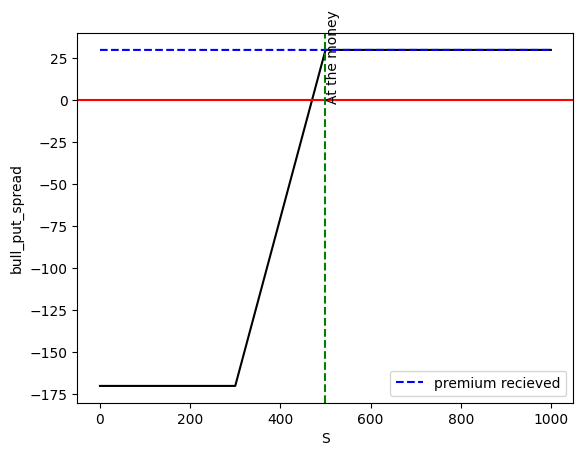

In [11]:
sns.lineplot(x = 'S', y = 'bull_put_spread', data = call_payoff_df, color = 'black')
sns.lineplot(x = 'S', y = 'prem_bull_put_spread', data = call_payoff_df, color = 'blue', linestyle = '--', label = 'premium recieved')
plt.axhline(y = 0.0, color = 'red', linestyle = '-')
plt.axvline(500, ymin = 0, ymax = 1, color = 'green', linestyle = '--')
plt.text(500 + 0.5, 0, 'At the money',rotation=90)

Text(500.5, 0, 'At the money')

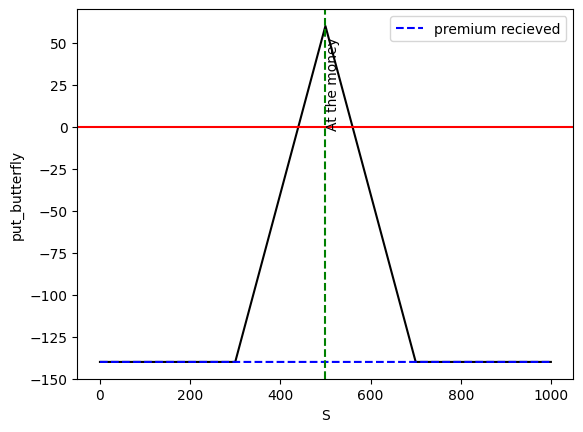

In [12]:
sns.lineplot(x = 'S', y = 'put_butterfly', data = call_payoff_df, color = 'black')
sns.lineplot(x = 'S', y = 'prem_put_butterfly', data = call_payoff_df, color = 'blue', linestyle = '--', label = 'premium recieved')
plt.axhline(y = 0.0, color = 'red', linestyle = '-')
plt.axvline(500, ymin = 0, ymax = 1, color = 'green', linestyle = '--')
plt.text(500 + 0.5, 0, 'At the money',rotation=90)

Text(500.5, 0, 'At the money')

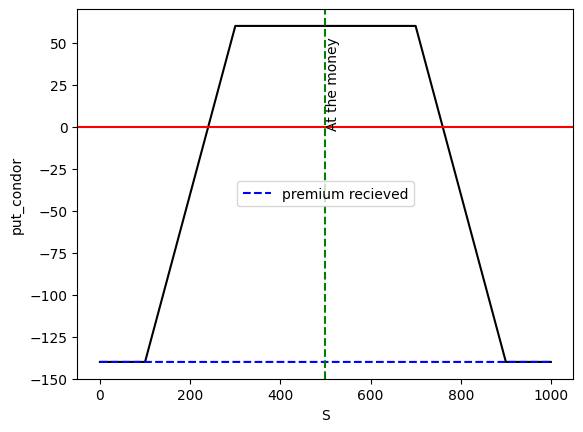

In [13]:
sns.lineplot(x = 'S', y = 'put_condor', data = call_payoff_df, color = 'black')
sns.lineplot(x = 'S', y = 'prem_put_condor', data = call_payoff_df, color = 'blue', linestyle = '--', label = 'premium recieved')
plt.axhline(y = 0.0, color = 'red', linestyle = '-')
plt.axvline(500, ymin = 0, ymax = 1, color = 'green', linestyle = '--')
plt.text(500 + 0.5, 0, 'At the money',rotation=90)

Text(500.5, 0, 'At the money')

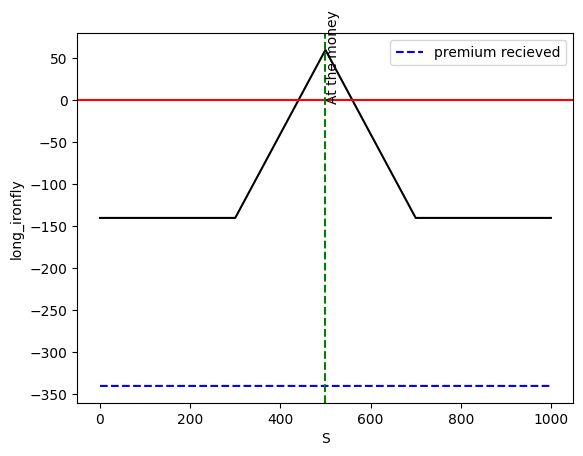

In [14]:
sns.lineplot(x = 'S', y = 'long_ironfly', data = call_payoff_df, color = 'black')
sns.lineplot(x = 'S', y = 'prem_long_ironfly', data = call_payoff_df, color = 'blue', linestyle = '--', label = 'premium recieved')
plt.axhline(y = 0.0, color = 'red', linestyle = '-')
plt.axvline(500, ymin = 0, ymax = 1, color = 'green', linestyle = '--')
plt.text(500 + 0.5, 0, 'At the money',rotation=90)

Text(500.5, 0, 'At the money')

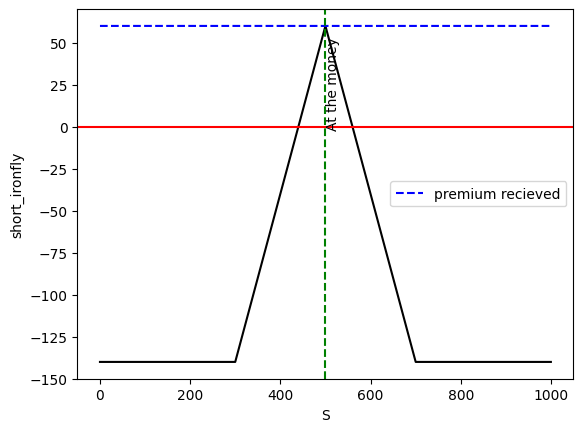

In [15]:
sns.lineplot(x = 'S', y = 'short_ironfly', data = call_payoff_df, color = 'black')
sns.lineplot(x = 'S', y = 'prem_short_ironfly', data = call_payoff_df, color = 'blue', linestyle = '--', label = 'premium recieved')
plt.axhline(y = 0.0, color = 'red', linestyle = '-')
plt.axvline(500, ymin = 0, ymax = 1, color = 'green', linestyle = '--')
plt.text(500 + 0.5, 0, 'At the money',rotation=90)

Text(500.5, 0, 'At the money')

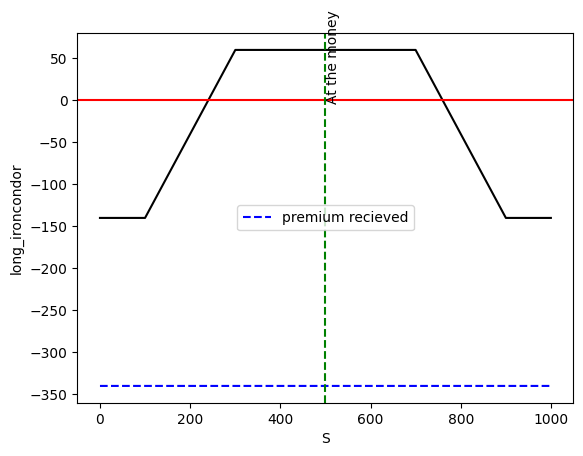

In [16]:
sns.lineplot(x = 'S', y = 'long_ironcondor', data = call_payoff_df, color = 'black')
sns.lineplot(x = 'S', y = 'prem_long_ironcondor', data = call_payoff_df, color = 'blue', linestyle = '--', label = 'premium recieved')
plt.axhline(y = 0.0, color = 'red', linestyle = '-')
plt.axvline(500, ymin = 0, ymax = 1, color = 'green', linestyle = '--')
plt.text(500 + 0.5, 0, 'At the money',rotation=90)

Text(500.5, 0, 'At the money')

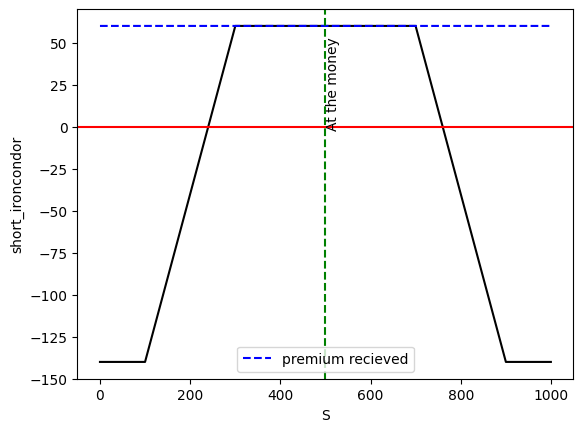

In [17]:
sns.lineplot(x = 'S', y = 'short_ironcondor', data = call_payoff_df, color = 'black')
sns.lineplot(x = 'S', y = 'prem_short_ironcondor', data = call_payoff_df, color = 'blue', linestyle = '--', label = 'premium recieved')
plt.axhline(y = 0.0, color = 'red', linestyle = '-')
plt.axvline(500, ymin = 0, ymax = 1, color = 'green', linestyle = '--')
plt.text(500 + 0.5, 0, 'At the money',rotation=90)